In [2]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models , layers , optimizers
import matplotlib.pyplot as plt

In [4]:
(test_data , test_labels) , (train_data , train_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data)

2246

In [6]:
len(test_data)

8982

In [7]:
train_data[10]

[1,
 361,
 372,
 8,
 77,
 62,
 325,
 4105,
 336,
 5,
 1605,
 37,
 412,
 453,
 1187,
 229,
 334,
 13,
 4,
 867,
 76,
 4,
 76,
 1726,
 6,
 264,
 2337,
 18,
 82,
 95,
 97,
 2220,
 4,
 1004,
 649,
 18,
 82,
 554,
 136,
 4,
 143,
 334,
 290,
 126,
 5,
 4,
 2820,
 777,
 2,
 1386,
 13,
 954,
 7,
 4,
 314,
 912,
 224,
 4,
 2370,
 1128,
 54,
 429,
 2,
 18,
 82,
 5,
 496,
 1187,
 229,
 57,
 85,
 385,
 593,
 6,
 4,
 867,
 76,
 17,
 12]

In [10]:
word_index = reuters.get_word_index()
reserve_words_index = dict([(value,key) for key ,value in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoders = ' '.join([reserve_words_index.get(i-3,'?') for i in train_data[10]])
decoders

"? grain traders said they were still awaiting results of yesterday's u k intervention feed wheat tender for the home market the market sought to buy 340 000 tonnes more than double the remaining 150 000 tonnes available under the current tender however some of the tonnage included ? bids for supplies in the same stores since the tenders started last july ? 000 tonnes of british feed wheat have been sold back to the home market reuter 3"

In [12]:
train_labels[20]

8

In [0]:
# vectorizing our data

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# vectorizing our labels using one hot encode

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1246 samples, validate on 1000 samples
Epoch 1/20





1246/1246 [==============================] - 1s 814us/step - loss: 3.7128 - acc: 0.2424 - val_loss: 3.2802 - val_acc: 0.4590
Epoch 2/20
1246/1246 [==============================] - 0s 211us/step - loss: 3.0230 - acc: 0.4864 - val_loss: 2.7414 - val_acc: 0.4980
Epoch 3/20
1246/1246 [==============================] - 0s 212us/step - loss: 2.3862 - acc: 0.5827 - val_loss: 2.3541 - val_acc: 0.5430
Epoch 4/20
1246/1246 [==============================] - 0s 206us/step - loss: 1.9152 - acc: 0.6493 - val_loss: 2.0732 - val_acc: 0.6340
Epoch 5/20
1246/1246 [==============================] - 0s 209us/step - loss: 1.5832 - acc: 0.7055 - val_loss: 1.9133 - val_acc: 0.6200
Epoch 6/20
1246/1246 [==============================] - 0s 216us/step - loss: 1.3388 - acc: 0.7360 - val_loss: 1.7935 - val_acc: 0.6280
Epoch 7/20
1246/1246 [============

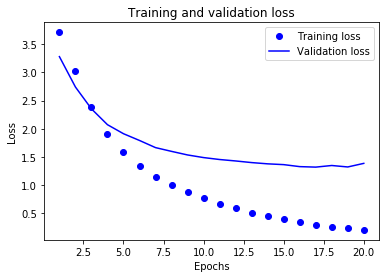

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

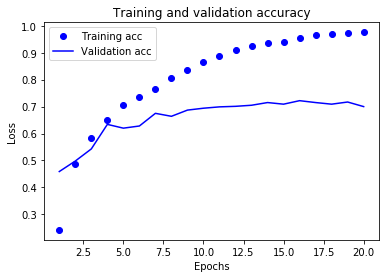

In [26]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
#it seems that the network starts overfitting after 16 epochs.
#Let's train a new network from scratch for 8 epochs, then let's evaluate it on the test

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=16,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 1246 samples, validate on 1000 samples
Epoch 1/16
1246/1246 [==============================] - 1s 404us/step - loss: 3.6931 - acc: 0.2729 - val_loss: 3.2116 - val_acc: 0.5240
Epoch 2/16
1246/1246 [==============================] - 0s 213us/step - loss: 2.9358 - acc: 0.5498 - val_loss: 2.6421 - val_acc: 0.5330
Epoch 3/16
1246/1246 [==============================] - 0s 230us/step - loss: 2.2811 - acc: 0.5778 - val_loss: 2.2632 - val_acc: 0.5560
Epoch 4/16
1246/1246 [==============================] - 0s 210us/step - loss: 1.8354 - acc: 0.6437 - val_loss: 2.0118 - val_acc: 0.5740
Epoch 5/16
1246/1246 [==============================] - 0s 202us/step - loss: 1.5190 - acc: 0.6830 - val_loss: 1.8460 - val_acc: 0.5950
Epoch 6/16
1246/1246 [==============================] - 0s 206us/step - loss: 1.2876 - acc: 0.7303 - val_loss: 1.7203 - val_acc: 0.6170
Epoch 7/16
1246/1246 [==============================] - 0s 202us/step - loss: 1.1118 - acc: 0.7705 - val_loss: 1.6302 - val_acc: 0.6370


In [28]:
results

[1.3171999623583834, 0.7150968604405297]

In [0]:
prediction = model.predict(x_test)

In [30]:
prediction[0].shape

(46,)

In [32]:
# trying with different layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=16,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 1246 samples, validate on 1000 samples
Epoch 1/16
1246/1246 [==============================] - 1s 537us/step - loss: 3.7545 - acc: 0.1188 - val_loss: 3.3798 - val_acc: 0.5600
Epoch 2/16
1246/1246 [==============================] - 0s 209us/step - loss: 3.1288 - acc: 0.5642 - val_loss: 2.7044 - val_acc: 0.5420
Epoch 3/16
1246/1246 [==============================] - 0s 210us/step - loss: 2.3771 - acc: 0.5690 - val_loss: 2.2754 - val_acc: 0.5220
Epoch 4/16
1246/1246 [==============================] - 0s 212us/step - loss: 1.8822 - acc: 0.5891 - val_loss: 2.0446 - val_acc: 0.5740
Epoch 5/16
1246/1246 [==============================] - 0s 226us/step - loss: 1.5863 - acc: 0.6396 - val_loss: 1.8142 - val_acc: 0.6080
Epoch 6/16
1246/1246 [==============================] - 0s 213us/step - loss: 1.3317 - acc: 0.6942 - val_loss: 1.7030 - val_acc: 0.6390
Epoch 7/16
1246/1246 [==============================] - 0s 221us/step - loss: 1.1632 - acc: 0.7311 - val_loss: 1.6230 - val_acc: 0.6380


In [36]:
# trying with different layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=16,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 1246 samples, validate on 1000 samples
Epoch 1/16
1246/1246 [==============================] - 1s 588us/step - loss: 3.6124 - acc: 0.3122 - val_loss: 3.0455 - val_acc: 0.5390
Epoch 2/16
1246/1246 [==============================] - 0s 223us/step - loss: 2.7348 - acc: 0.6100 - val_loss: 2.5821 - val_acc: 0.5930
Epoch 3/16
1246/1246 [==============================] - 0s 223us/step - loss: 2.1683 - acc: 0.6790 - val_loss: 2.2729 - val_acc: 0.6260
Epoch 4/16
1246/1246 [==============================] - 0s 222us/step - loss: 1.7845 - acc: 0.7175 - val_loss: 2.0585 - val_acc: 0.6570
Epoch 5/16
1246/1246 [==============================] - 0s 222us/step - loss: 1.5087 - acc: 0.7616 - val_loss: 1.9086 - val_acc: 0.6490
Epoch 6/16
1246/1246 [==============================] - 0s 222us/step - loss: 1.2966 - acc: 0.7849 - val_loss: 1.7994 - val_acc: 0.6530
Epoch 7/16
1246/1246 [==============================] - 0s 215us/step - loss: 1.1257 - acc: 0.8250 - val_loss: 1.7047 - val_acc: 0.6750
